# Loading Dependencies

In [4]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from datetime import datetime
import imageio

## Reading and preparing Data

### data is loaded from <b> Olivetti face data </b>

In [58]:
from sklearn.datasets import fetch_olivetti_faces 
faces = fetch_olivetti_faces().data
labels=fetch_olivetti_faces().target

index_label=np.arange(len(faces))
np.random.shuffle(index_label)

faces=faces[index_label]
labels=labels[index_label]

split=0.9
k=int(split*faces.shape[0])
train_faces=faces[:k,:]
train_labels=labels[:k]
test_faces=faces[k:,:]
test_labels=labels[k:]
print(train_faces.shape)
print(train_labels.shape)
print(test_faces.shape)
print(test_labels.shape)

(360, 4096)
(360,)
(40, 4096)
(40,)


In [59]:
images=np.asarray([np.reshape(image, (64,64)) for image in train_faces])
print(images.shape)

(360, 64, 64)


#### <span style="color:yellow">Displaying face of one person</span>

(10, 64, 64)


(9, 64, 64)


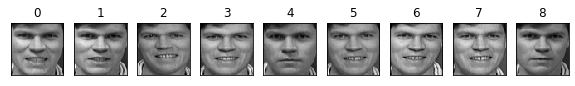

In [61]:
person_id=32
image_one=images[train_labels==person_id]
print(image_one.shape)
n=image_one.shape[0]

fig= plt.figure(figsize=(10,n))
fig.patch.set_facecolor('white')
#ax.axes.xaxis.set_visible(false)
j=1
np.random.seed(0)
for i in range(n):
    ax=fig.add_subplot(1,n,j, xticks=[],yticks=[])
    ax.set_title(i)
    ax.imshow(image_one[i],cmap='gray')
    j=j+1

plt.show()

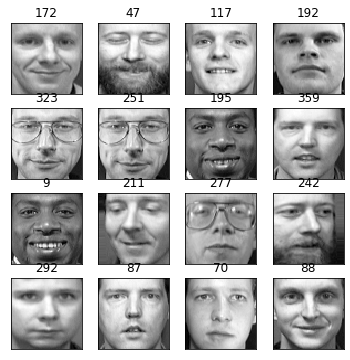

In [62]:
fig= plt.figure(figsize=(6,6))
fig.patch.set_facecolor('white')
#ax.axes.xaxis.set_visible(false)
j=1
np.random.seed(0)
for i in np.random.choice(images.shape[0],16):
    ax=fig.add_subplot(4,4,j, xticks=[],yticks=[])
    ax.set_title(i)
    ax.imshow(images[i],cmap='gray')
    j=j+1

plt.show()

# PCA

####  Finding mean face 

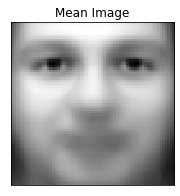

In [63]:
n=images.shape[0]
mean_img=np.sum(images,axis=0)/n
fig=plt.figure(figsize=(3,3))
fig.patch.set_facecolor('white')
ax=fig.add_subplot(xticks=[],yticks=[])
ax.imshow(mean_img,cmap='gray')
ax.set_title('Mean Image')
plt.show()

### Subtract mean image from each figure
##### this shifts the data vectors to origin

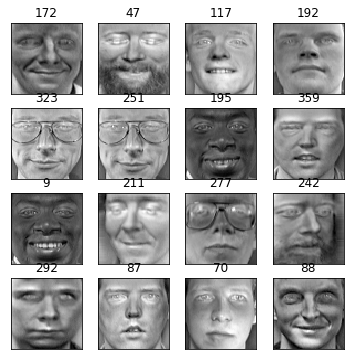

In [64]:
centered_images = np.asarray([(im - mean_img ) for im in images])
#print(centered_images.shape)
## subtracted images are 

j=1
np.random.seed(0)
fig= plt.figure(figsize=(6,6))
fig.patch.set_facecolor('white')
for i in np.random.choice(400,16):
    ax=fig.add_subplot(4,4,j, xticks=[],yticks=[])
    ax.set_title(i)
    ax.imshow(centered_images[i],cmap='gray')
    j=j+1

plt.show()

## Covarience Matrix
Now we have the images data shifted to origin
here we will find co-varience matrix for PCA

In [66]:
#onvert images back to flatenned vectors

vec_images=np.asarray([np.reshape(img,(img.shape[0]*img.shape[1])) for img in centered_images])
#print(vec_images.shape)

m=vec_images.shape[0]
d=vec_images.shape[1]

# m is total no of images
#d is the dimension of flatenned image
print('no of images : :', m)
cov_matrix=np.zeros(d*d)
cov_matrix=np.reshape(cov_matrix,(d,d))
for i in range(m):
    cov_matrix+=(np.outer(vec_images[i],vec_images[i]))
#cov_matrix=np.outer(vec_images[0],vec_images[0])
cov_matrix=cov_matrix/m
print("shape of covarience matrix ::", cov_matrix.shape)

no of images : : 360
shape of covarience matrix :: (4096, 4096)


Now we will find and display the varience image.

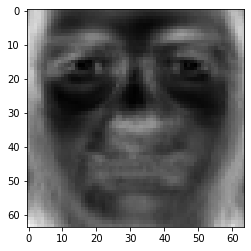

In [67]:
img_dim=int(np.sqrt(d))
sigma_image=np.diagonal(cov_matrix).reshape(img_dim,img_dim)
plt.imshow(sigma_image,cmap='gray')
plt.show()

## Eigen Values and Eigen Faeces
<ul>
    <li>Next we will find eigen vales and eigen faces  </li>
    <li>Sort eigen vales in descending order </li>
    <li>  first k eigenvectors corresponding to the first eigen<br> values will be taken as eigen faces</li>
</ul>




In [68]:
lm, eig_vec_col = np.linalg.eig(cov_matrix)

In [69]:
print('shape of eigen_values : ', lm.shape)
print('shape of eigen_faces : ', eig_vec_col.shape)
#print(lm)
eig_vec=np.transpose(eig_vec_col)
sort_index=np.argsort(lm)
sort_index=sort_index[::-1]
lm=lm[sort_index]
eig_vec=eig_vec[sort_index,:]
#
#print(np.argmax(lm))

shape of eigen_values :  (4096,)
shape of eigen_faces :  (4096, 4096)


Sorting the eigen values to get top order eigen-faces

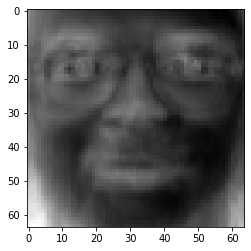

In [72]:

plt.imshow(np.reshape(eig_vec[0],(64,64)), cmap='gray')
plt.show()

<hr>
Here we have got d eigen values and d eigen vectors <br>
correspoding to dxd co-varience matrix.<br>
<span style="color:red">will all the eigen vectors be unique, if yes why</span><br>
Hence now, we have calculated eigenvalues and wigen faces <br>
Now we will plot some of the eigenfaces
<hr>

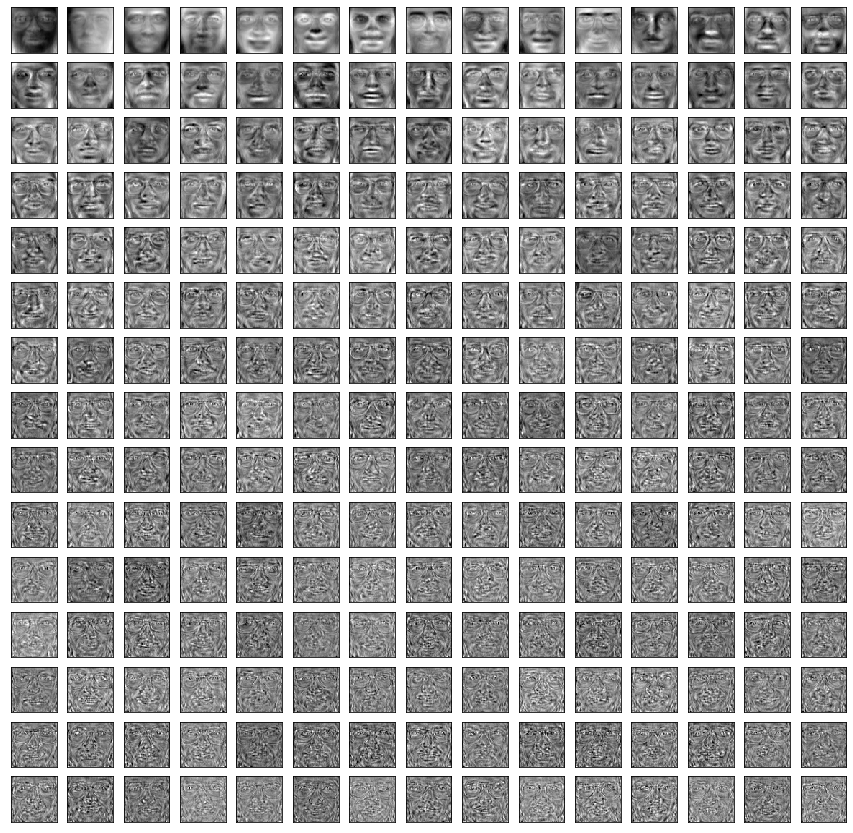

In [73]:
j=1
np.random.seed(0)
fig= plt.figure(figsize=(15,15))
fig.patch.set_facecolor('white')
for i in range(15*15):
    ax=fig.add_subplot(15,15,j, xticks=[],yticks=[])
    #ax.set_title(i)
    ax.imshow(np.reshape(eig_vec[i],(64,64)),cmap='gray')
    j=j+1

plt.show()

### Getting Coefficients
Now we try to get the coefficients for a given image corresponding <br>
corresponding to different eigen faces

In [74]:
#img passed to this function has to be 
# a flatenned image 
# 1D numpy array
def get_img_cf(img, eig_faces,mean_img):
    img=img-mean_img
    c_img=[]
    no_of_eig_faces=eig_faces.shape[0]
    #eig_faces=eig_vec[0:no_of_eig_faces,:]
    #print(eig_faces.shape)
    for i in range(no_of_eig_faces):
        c_img.append(np.dot(img,eig_faces[i]))
    c_img=np.asarray(c_img)
    return(c_img)
#print(c_img)

<hr>Follow, we try to regenerate the image from the given eigen faces<hr>

In [75]:
def reconstruct_img(c_img,eig_faces):
    recon_img=np.zeros(eig_faces.shape[1])
    for i in range(eig_faces.shape[0]):
        recon_img+=c_img[i]*eig_faces[i]
    recon_img=recon_img+mean_img.reshape(1,64*64)    
    return(recon_img)


## Calculating residuals
Now with given number of eigenfaces we are able to reconstruct the <br> 
given image, so here we wil test how good our algorihm is working to <br>
project dxd dimensional image to a lower imensional space <br>
we will now subtract the given imaeges and then compare the difference <br>
we will plot the difference image also <br> Jst for some fun

In [76]:
def calc_residual(img1,img2):
    res_pic=(img1-img2)
    res=np.sum(img1-img2)
    return(res,res_pic)

In [77]:
def test_PCA(img,no_EF,plot=False):
    eig_fc=eig_vec[0:no_EF,:]
    mean=np.reshape(mean_img,(1,64*64))
    coeff=get_img_cf(img,eig_fc,mean)
    r_img=reconstruct_img(coeff,eig_fc)
    res,res_pic=calc_residual(r_img,img)
    
    if(plot):
        fig=plt.figure(figsize=(9,3))
        fig.patch.set_facecolor('white')
        ax1=fig.add_subplot(1,3,1,xticks=[],yticks=[])
        ax1.imshow(img.reshape(64,64), cmap='gray')
        ax1.set_title('original image')

        ax2=fig.add_subplot(1,3,2,xticks=[],yticks=[])
        ax2.imshow(r_img.reshape(64,64), cmap='gray')
        ax2.set_title('reconstructed image')

        ax3=fig.add_subplot(1,3,3,xticks=[],yticks=[])
        ax3.imshow(res_pic.reshape(64,64), cmap='gray')
        ax3.set_title('residual image')
        plt.show()
        
        print('scalar Residual value :: ',res)
        
        return(res,fig)
    else:
        return(res)






## Testing our model
<hr>

#### Testing on training faces

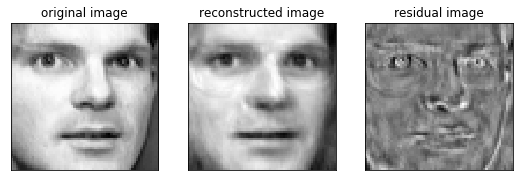

scalar Residual value ::  -1.5034784623955104


(-1.5034784623955104, <Figure size 648x216 with 3 Axes>)

In [79]:
test_PCA(train_faces[30],100,1)

#### Testimg on Test Faces

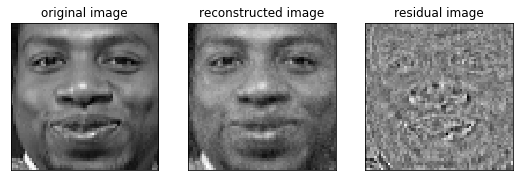

scalar Residual value ::  0.4019713176643138


(0.4019713176643138, <Figure size 648x216 with 3 Axes>)

In [80]:
test_PCA(test_faces[30],1000,1)

#### Testing on external Image

#### Non face image

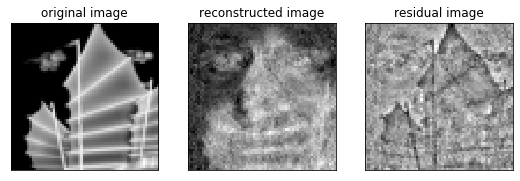

scalar Residual value ::  -1067.42924529006


(-1067.42924529006, <Figure size 648x216 with 3 Axes>)

In [81]:
im = imageio.imread('test_subjects/sheep_cropped.png')
im=np.asarray(im).reshape(64*64)
test_PCA(im,1000,1)

#### on image containing face

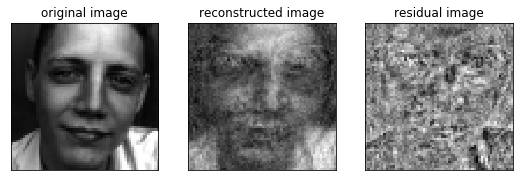

scalar Residual value ::  -847.9958366407302


(-847.9958366407302, <Figure size 648x216 with 3 Axes>)

In [82]:
im = imageio.imread('test_subjects/man_cropped.png')
im=np.asarray(im).reshape(64*64)
test_PCA(im,1000,1)

### Inference
<ul>
    <li>The PCA is able to reconstruct train image effectively <br> with 1000 eigen-faces, the residual is extremely small <br>
        of the order of 10e(-7)
    </li>
    <li> It is able to reconstruct test_faces also <br> which were not involved in calculation of eigen faces<br>
        residual is of the order of 0.1
    </li>
    <li> On external image containing face also, we are able to reconstruct image with <br> residual of the order of 700
        <br> this rather high residual is de to the fact that the external image is not pre-processed yet.</li>
    <li>The proof of concept that we are able to reconstruct the image is that <br> with an external non-face image the residual is much higher</li>
    <li>At this point, with fixing p certain threshold , we cam classify given image as "face-image" or "non-face image"</li>
</ul>

## Image Preprocessing
<hr>

#### Normalize Image

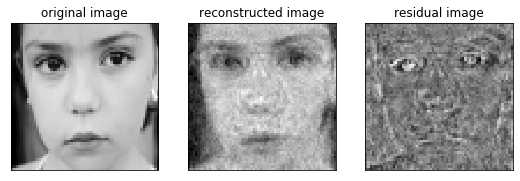

scalar Residual value ::  -30.73525529287864


(-30.73525529287864, <Figure size 648x216 with 3 Axes>)

In [83]:
im = imageio.imread('test_subjects/girl.png')
im = np.asarray(im).reshape(64*64)
im = im/np.std(im)
test_PCA(im,1000,1)

In [84]:
print(im)

[0.52313701 0.52313701 0.62001423 ... 4.45635231 3.23569928 0.89127046]
